[[0.         1.         1.         3.16227766 2.82842712 3.60555128]
 [1.         0.         1.41421356 2.23606798 2.23606798 2.82842712]
 [1.         1.41421356 0.         3.         2.23606798 3.16227766]
 [3.16227766 2.23606798 3.         0.         1.41421356 1.        ]
 [2.82842712 2.23606798 2.23606798 1.41421356 0.         1.        ]
 [3.60555128 2.82842712 3.16227766 1.         1.         0.        ]]
[[0. 1. 1. 0. 1. 0.]
 [1. 0. 1. 1. 1. 1.]
 [1. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 1.]
 [1. 1. 1. 1. 0. 1.]
 [0. 1. 0. 1. 1. 0.]]
[[ 3. -1. -1.  0. -1.  0.]
 [-1.  5. -1. -1. -1. -1.]
 [-1. -1.  3.  0. -1.  0.]
 [ 0. -1.  0.  3. -1. -1.]
 [-1. -1. -1. -1.  5. -1.]
 [ 0. -1.  0. -1. -1.  3.]]
[[ 1.         -0.25819889 -0.33333333  0.         -0.25819889  0.        ]
 [-0.25819889  1.         -0.25819889 -0.25819889 -0.2        -0.25819889]
 [-0.33333333 -0.25819889  1.          0.         -0.25819889  0.        ]
 [ 0.         -0.25819889  0.          1.         -0.25819889 -0.33333

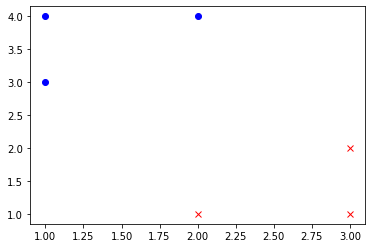

In [113]:
import numpy as np
import matplotlib.pyplot as plt


def EuclidDistance(x1, x2):
    res = np.sqrt(np.sum((x1-x2)**2))
    return res

def DistanceMatrix(X):
    X = np.array(X)
    S = np.zeros((len(X), len(X)))
    for i in range(len(X)):
        for j in range(i+1, len(X)):
            S[i][j] = EuclidDistance(X[i], X[j])
            S[j][i] = S[i][j]
    return S
def AdjacentMatrix(S, k, sigma=1.0):
    N = len(S)
    A = np.zeros((N,N))
    for i in range(N):
        list1=[]
        for j in range(N):
            list1.append(S[i][j])
        list1.sort()
        #print(list1[4])
        #print(list1)
        #B[i]=[np.sort(S[i][j],axis=1,kind='quicksort',order=None) for j in range(N)]
        for j in range(N):          
            if(S[i][j]<=list1[3] ):
                A[i][j]=1.0
            A[j][i]=A[i][j]
        A[i][i]=0       
    return A
def LaplacianMatrix(AdjacentMatrix):

    # 算度矩阵 放到对角线上
    degreeMatrix = np.sum(AdjacentMatrix, axis=1)
    #print(degreeMatrix)
    #  L=D-A
    laplacianMatrix =  np.diag(degreeMatrix)  - AdjacentMatrix
    print( laplacianMatrix)

    # 标准化
    # D^(-1/2) L D^(-1/2)
    Matrix = np.diag( degreeMatrix ** (-0.5))
    a=[1,1,1,1,1,1]
    #print( sqrtDegreeMatrix)
    B=np.zeros((6,6))
    C=np.zeros((6,6))
    B=np.dot(Matrix,AdjacentMatrix)
    C=np.dot(B,Matrix)
    return np.diag(a)-C
p=[[1,1,2,2,3,3],
[4,3,4,1,2,1]]
#plt.plot(p[0],p[1],'rx')
#按照次小特征值得到的图
m=[[1,1,2],[4,3,4]]
n=[[2,3,3],[1,2,1]]
plt.plot(m[0],m[1],'bo')
plt.plot(n[0],n[1],'rx')
if __name__ == '__main__': 
    data=[(1,4),(1,3),(2,4),(2,1),(3,2),(3,1)]
    #X=np.array(data)
    #print(X[1])
    distance = DistanceMatrix(data)
    print(distance)
    Adjacent = AdjacentMatrix(distance, k=3)
    print(Adjacent)
    Laplacian = LaplacianMatrix(Adjacent)
    print(Laplacian)
    a,b=np.linalg.eig(Laplacian)
    #print(b)
    print(a)
    print(b[1])
